# SARSA Demo

In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import warnings
import gym, gym_walk
from sarsa import sarsa
from utils.common_utils import (evaluate_policy, print_policy_success_stats,
                                plot_state_value_function, plot_policy, rmse,
                                print_action_value_function, get_policy_metrics)
from value_iteration.value_iteration import value_iteration
warnings.filterwarnings('ignore')


In [4]:
env = gym.make('RandomWalk-v0')
init_state = env.reset()
goal_state = 6
gamma = 1.0  # Episodic
n_episodes = 500
P = env.env.P

LEFT, RIGHT = range(2)
pi = lambda s: {
    0: LEFT, 1: LEFT, 2: LEFT, 3: LEFT, 4: LEFT, 5: LEFT, 6: LEFT
}[s]
action_symbols = ['<', '>']
row, col = 1, 7

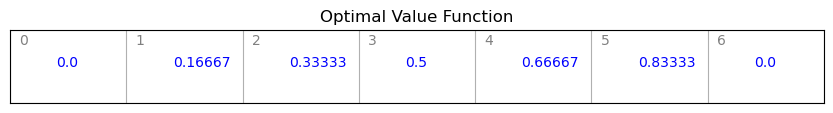

By using the Policy, success rate to reach goal is: 51.00%
By using the Policy, mean reward is: 0.5100


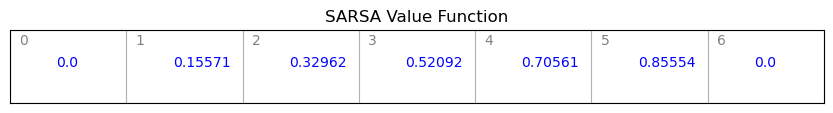

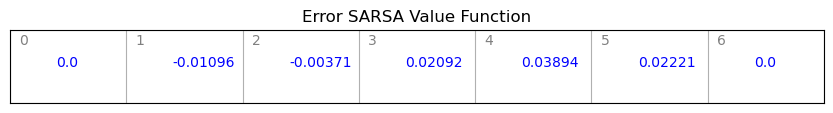

RMSE: 0.0192
+-------+-------+-------+
| state |   <   |   >   |
+-------+-------+-------+
|  0.0  |  0.0  |  0.0  |
|  1.0  | 0.147 | 0.156 |
|  2.0  |  0.33 | 0.312 |
|  3.0  | 0.493 | 0.521 |
|  4.0  | 0.653 | 0.706 |
|  5.0  | 0.825 | 0.856 |
|  6.0  |  0.0  |  0.0  |
+-------+-------+-------+
Action-value function RMSE: 0.0163


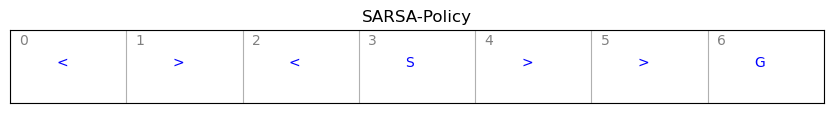

By using the Policy, success rate to reach goal is: 54.00%
By using the Policy, mean reward is: 0.5100


In [5]:
optimal_Q, optimal_V, optimal_pi = value_iteration(P, gamma)
plot_state_value_function(row, col, optimal_V, 'Optimal Value Function')
print_policy_success_stats(env, optimal_pi, goal_state=goal_state, gamma=gamma)

Q_sarsa, V_sarsa, pi_sarsa = sarsa(env, gamma=gamma, n_episodes=n_episodes)
plot_state_value_function(row, col, V_sarsa, 'SARSA Value Function')
plot_state_value_function(row, col, V_sarsa - optimal_V, 'Error SARSA Value Function')

print('RMSE:', rmse(V_sarsa, optimal_V))

print_action_value_function(Q_sarsa, action_symbols)
print('Action-value function RMSE: {}'.format(rmse(Q_sarsa, optimal_Q)))
plot_policy(pi_sarsa, P, row, col, 'SARSA-Policy', action_symbols, init_state, goal_state)
print_policy_success_stats(env, pi_sarsa, goal_state=goal_state, gamma=gamma)